In [1]:
%matplotlib inline

In [2]:
import glob

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from cue.analysis.analysis import bootstrap_ci
from cue.utils.plotting import *

In [3]:
style()

In [4]:
similarities = []
for filename in glob.glob('../../data/spikes-ctx/*.npz'):
    data = np.load(filename)
    avg_firing = np.mean(data['ctx_spikes'].reshape((12, -1, 800)), axis=1)
    population_vector = avg_firing / np.linalg.norm(avg_firing, axis=1)[:, None]
    similarities.append(np.dot(population_vector[:-1, :], population_vector[-1]))
similarities = np.array(similarities)

In [5]:
cis = np.array([bootstrap_ci(x, np.mean) for x in similarities.T])

In [6]:
m = np.mean(similarities, axis=0)
ci_l = m - cis[:, 0]
ci_u = cis[:, 1] - m

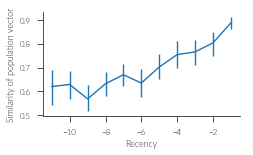

In [7]:
fig = plt.figure(figsize=single_fig_size)
ax = fig.add_subplot(1, 1, 1)
ax.errorbar(np.arange(-len(m), 0), m, yerr=(ci_l, ci_u))

ax.set_xlabel("Recency")
ax.set_ylabel("Similarity of population vector")

sns.despine(fig)
fig.tight_layout()

In [8]:
save_tight_fig(fig, '../../../phd-thesis/figures/popsim.pdf')